Nama : Yoan Rifqi Candra      
Bidang : Data Analyst

# Data Collecting

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
# memuat data
df_shipping = pd.read_csv("https://raw.githubusercontent.com/arubhasy/dataset/main/Shipping_Data.csv")

In [3]:
# tampilan data
df_shipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,Male,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Data Preparation

In [4]:
# info data
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10994 non-null  object
 8   Gender               10996 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# mengecek missing value
df_shipping.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     5
Gender                 3
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
# Drop column "ID" from df_shipping
df_shipping.drop(columns=['ID'], inplace=True)

df_shipping

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,Male,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
# Imputasi untuk kolom 'Product_importance' dengan modus
product_importance_mode = df_shipping['Product_importance'].mode()[0]
df_shipping['Product_importance'].fillna(product_importance_mode, inplace=True)

# Imputasi untuk kolom 'Gender' dengan modus
gender_mode = df_shipping['Gender'].mode()[0]
df_shipping['Gender'].fillna(gender_mode, inplace=True)

In [8]:
# mengecek missing value
df_shipping.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
# mengecek duplikasi data
df_shipping.duplicated().sum()

0

<ipython-input-10-e301e1ecacad>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-e301e1ecacad>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-e301e1ecacad>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_limit) | (df > upper_limit))


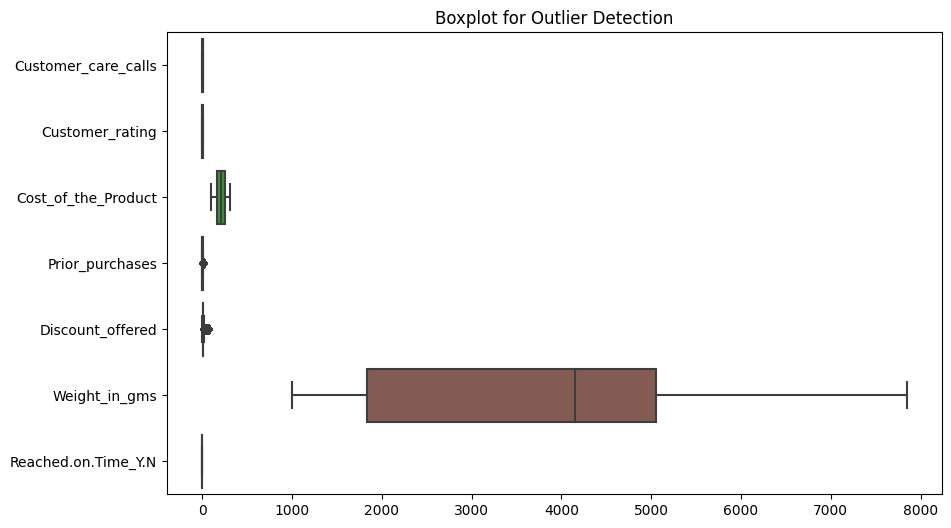

Outliers:


Cost_of_the_Product       0
Customer_care_calls       0
Customer_rating           0
Discount_offered       2209
Gender                    0
Mode_of_Shipment          0
Prior_purchases        1003
Product_importance        0
Reached.on.Time_Y.N       0
Warehouse_block           0
Weight_in_gms             0
dtype: int64

In [10]:
# mengecek outliers
# Fungsi untuk mengecek outlier dan membuat boxplot
def check_outliers(df):
    # Hitung batas bawah dan atas untuk setiap kolom
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Mengecek nilai outlier
    outliers = ((df < lower_limit) | (df > upper_limit))

    # Visualisasi boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient='h')
    plt.title('Boxplot for Outlier Detection')
    plt.show()

    return outliers

# Mengecek outlier dalam DataFrame df_shipping
outliers_df = check_outliers(df_shipping)

# Menampilkan nilai outlier
print("Outliers:")
outliers_df.sum()

<ipython-input-10-e301e1ecacad>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-e301e1ecacad>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-e301e1ecacad>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_limit) | (df > upper_limit))


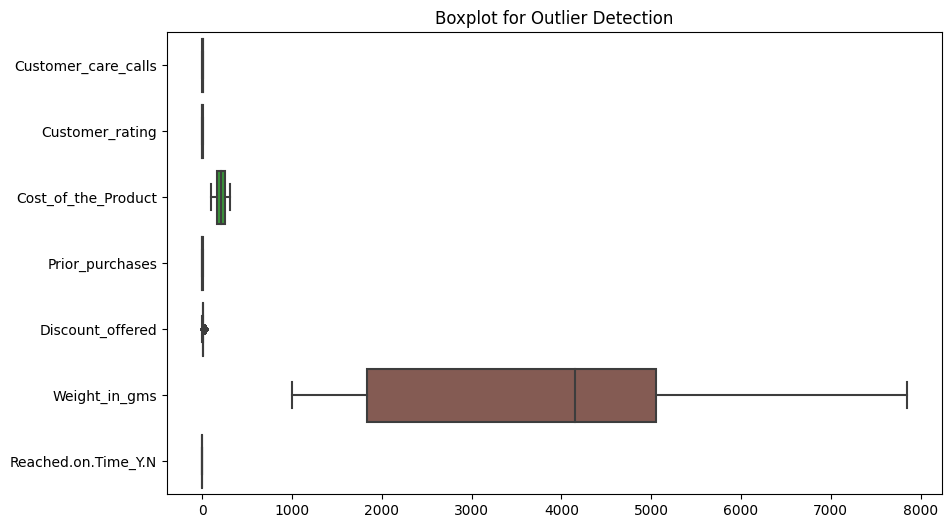

Outliers:


Cost_of_the_Product      0
Customer_care_calls      0
Customer_rating          0
Discount_offered       235
Gender                   0
Mode_of_Shipment         0
Prior_purchases          0
Product_importance       0
Reached.on.Time_Y.N      0
Warehouse_block          0
Weight_in_gms            0
dtype: int64

In [11]:
# Kolom yang akan ditangani outlier-nya
columns_to_handle_outliers = ['Discount_offered', 'Prior_purchases']

# Fungsi untuk mengganti outlier dengan median
def handle_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Ganti nilai outliers dengan median
    df[column] = np.where((df[column] < lower_limit) | (df[column] > upper_limit),
                          df[column].median(), df[column])

# Iterasi melalui kolom-kolom yang akan ditangani outliers-nya
for column in columns_to_handle_outliers:
    handle_outliers_with_median(df_shipping, column)

# Verifikasi perubahan
outliers_after_handling = check_outliers(df_shipping)

# Menampilkan nilai outlier
print("Outliers:")
outliers_after_handling.sum()

# Exploratory Data Analysis

In [12]:
# describe data
df_shipping.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.193654,6.180926,3634.016729,0.596691
std,1.141490,1.413603,48.063272,0.928892,3.176793,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,8.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,5.000000,19.000000,7846.000000,1.000000


In [13]:
df_shipping.shape

(10999, 11)

<ipython-input-14-95a1d9523150>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_shipping.corr()


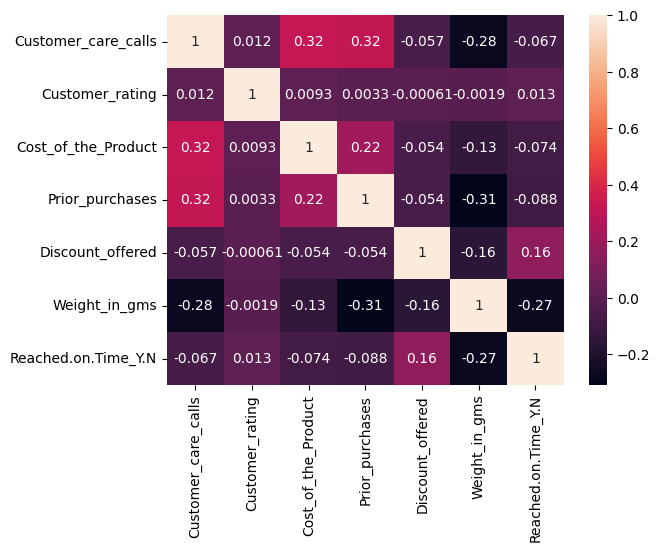

In [14]:
# Heatmap matrix korelasi untuk tipe data numerical
corr = df_shipping.corr()
sns.heatmap(corr, annot=True)
plt.show()

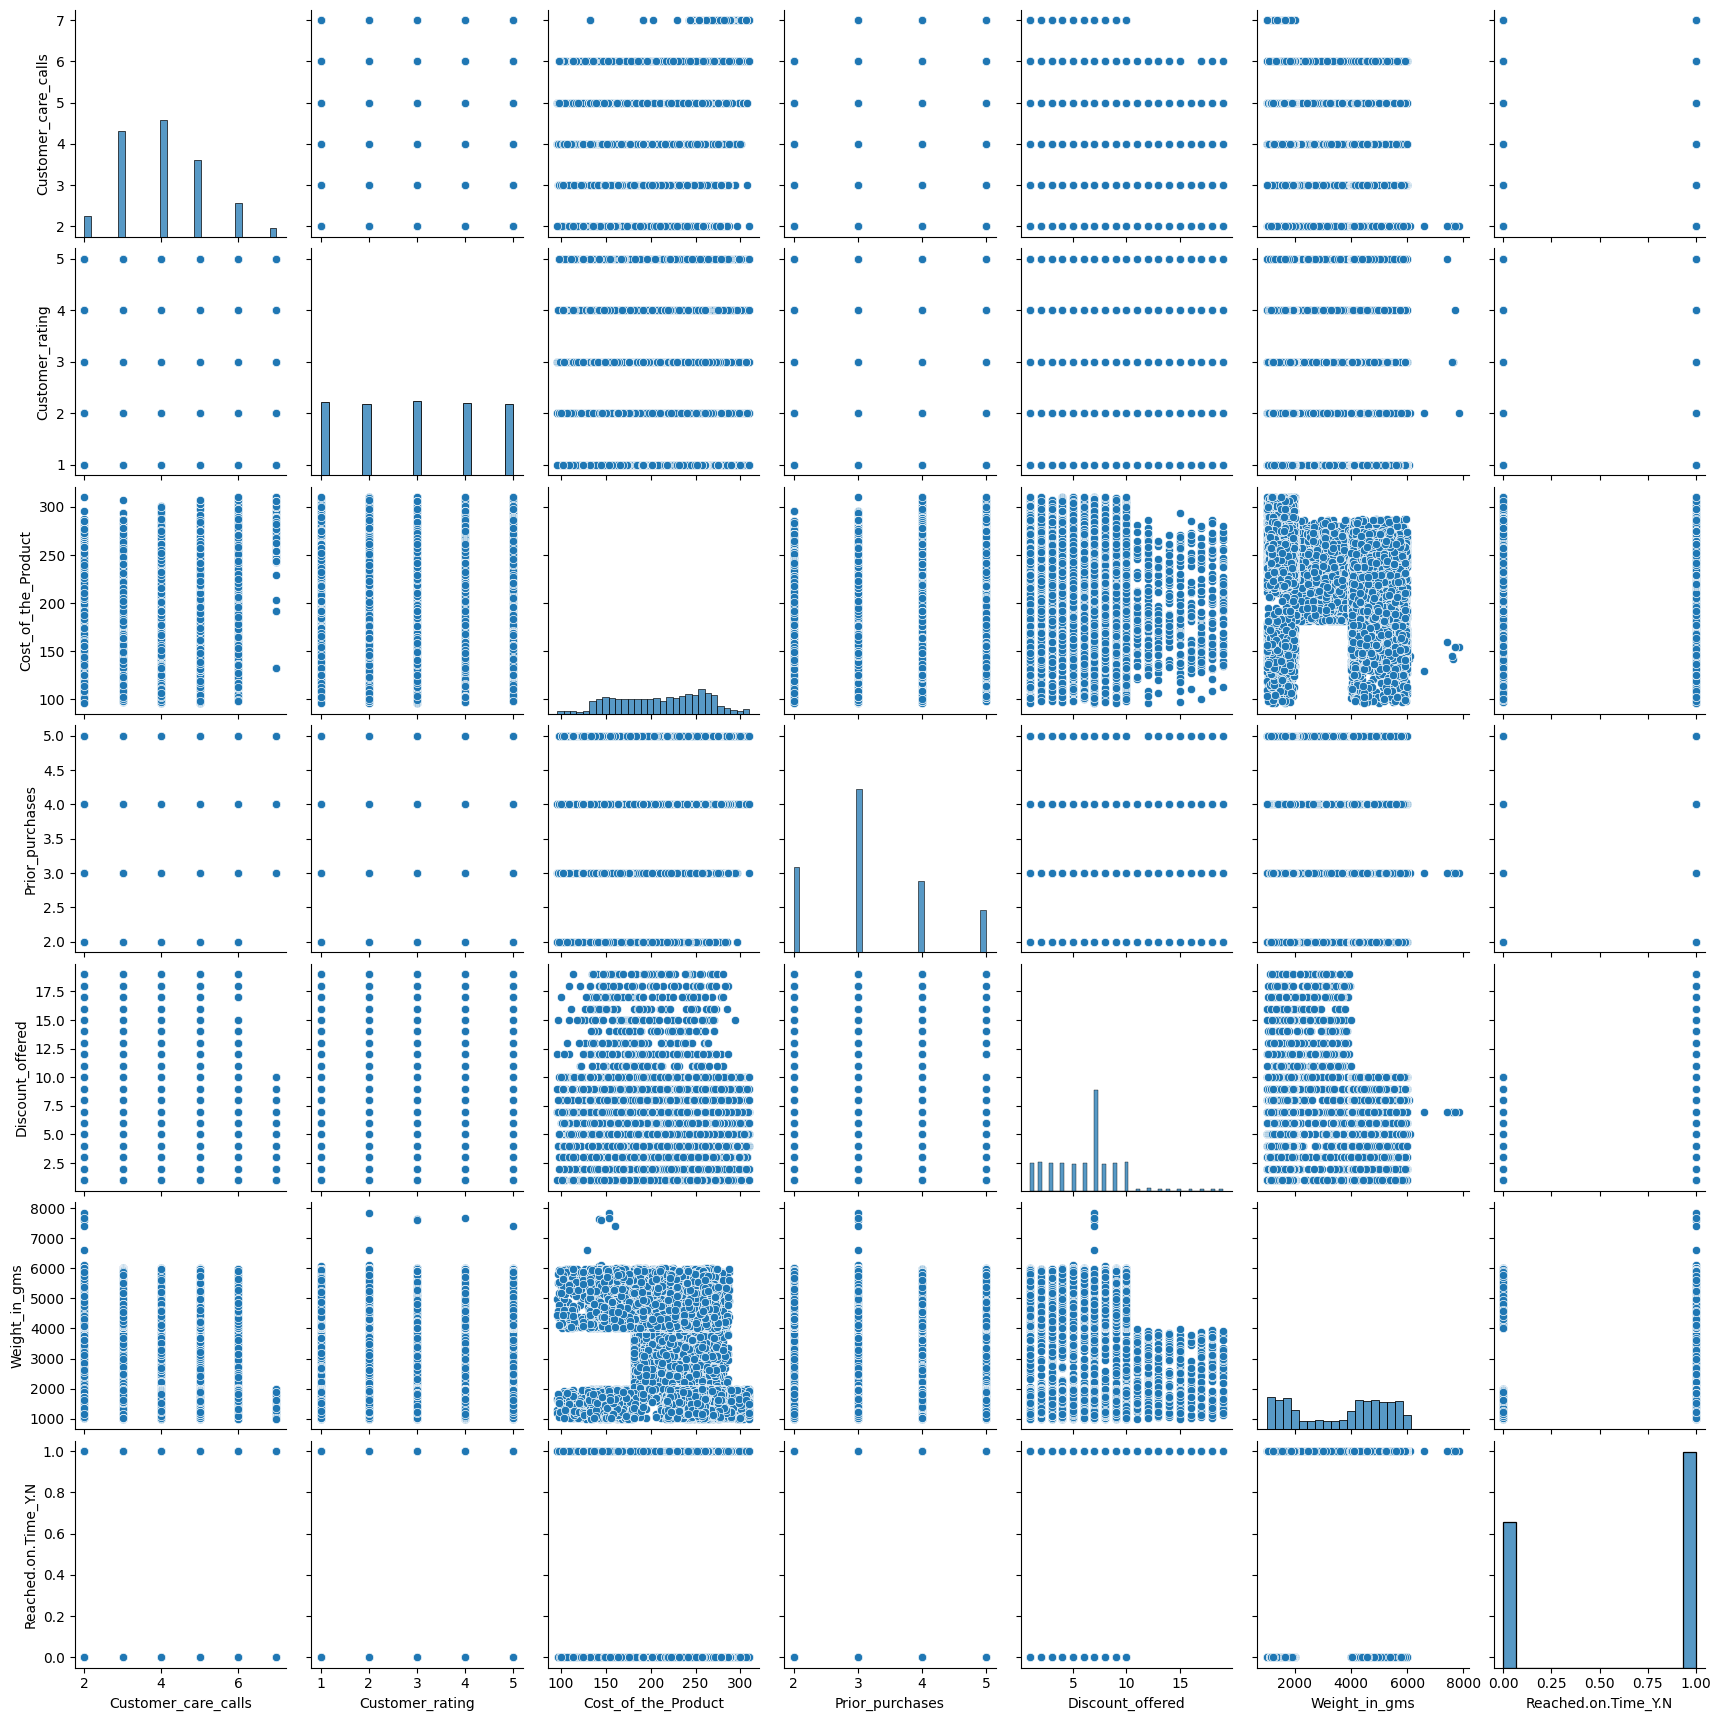

In [15]:
sns.pairplot(data=df_shipping)

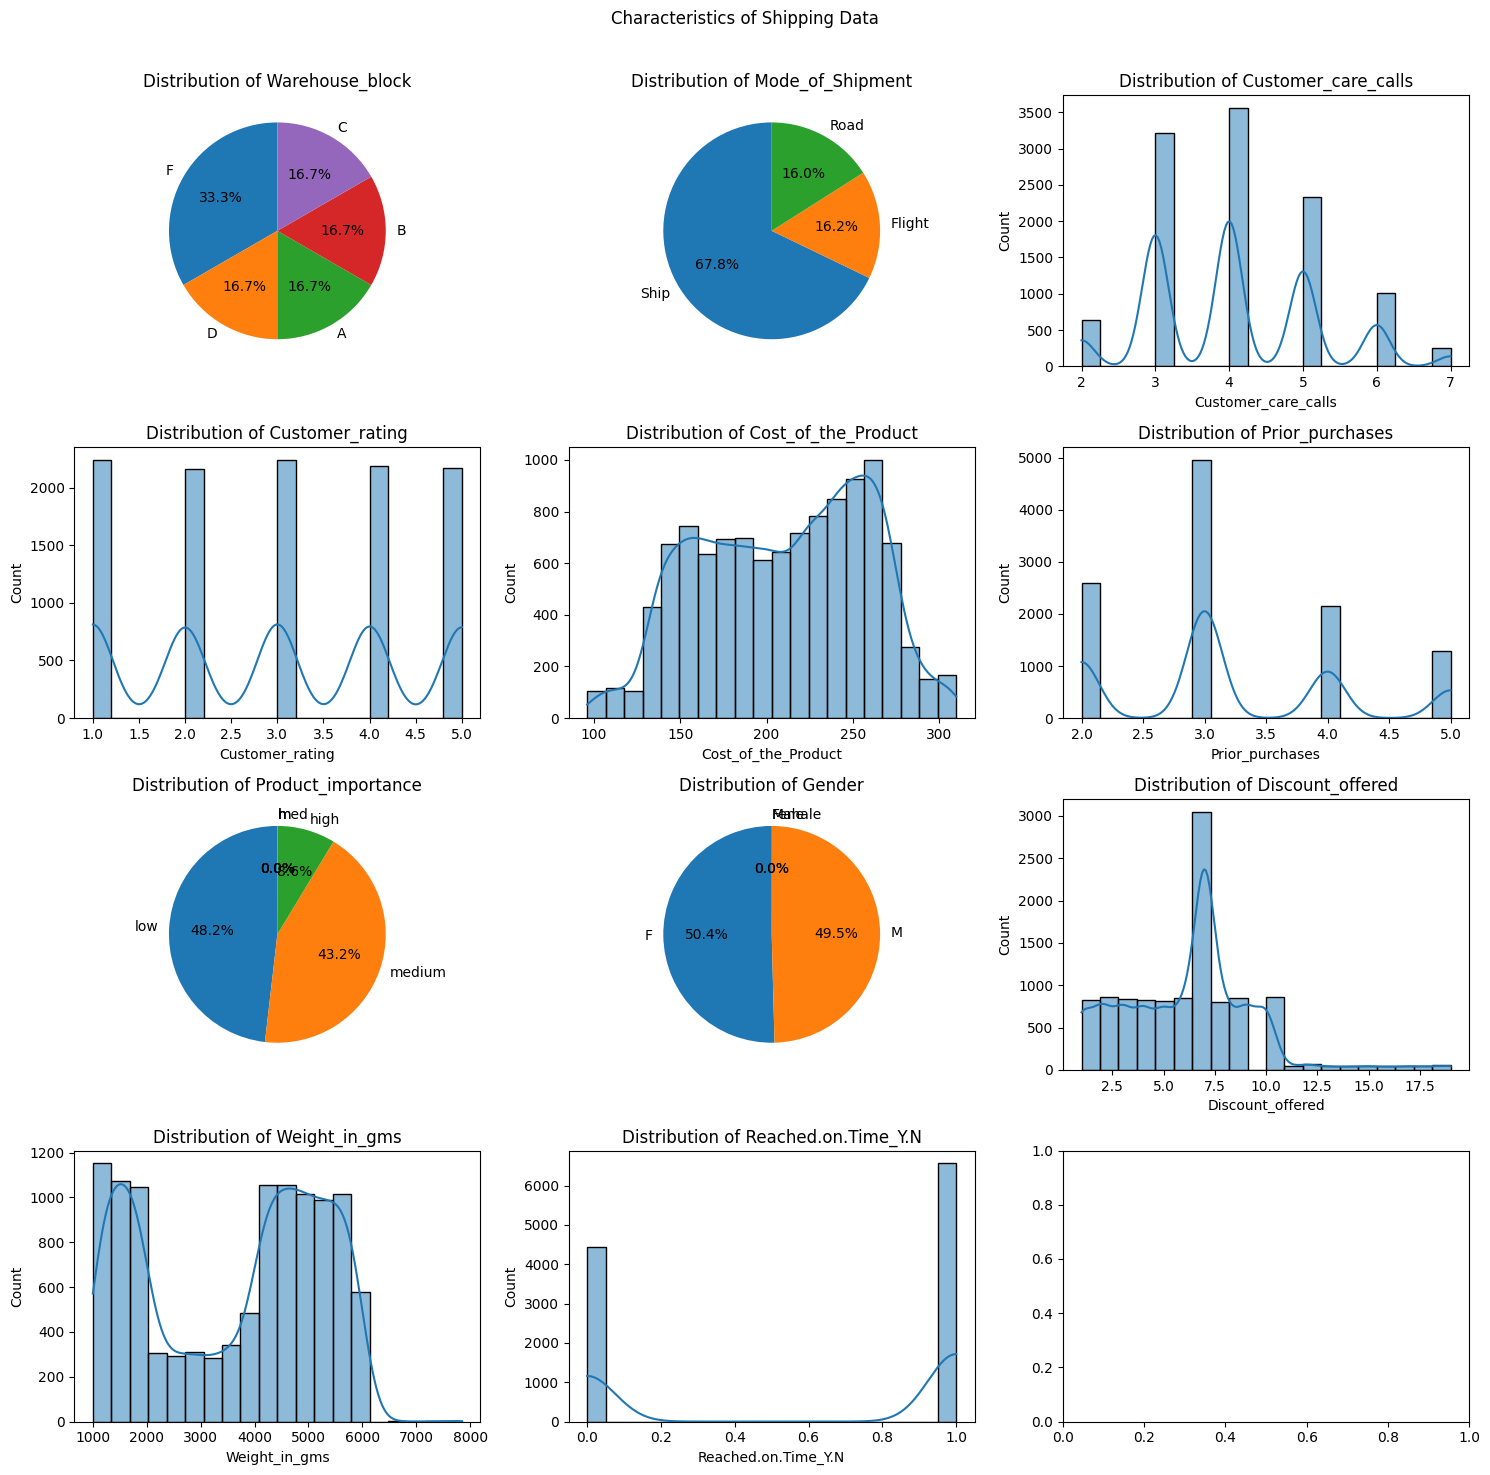

In [16]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Characteristics of Shipping Data')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each column in df_shipping
for i, column in enumerate(df_shipping.columns):
    # Check the data type of the column
    data_type = df_shipping[column].dtype

    # Plot based on data type
    if data_type == 'object':  # Categorical data
        value_counts = df_shipping[column].value_counts()
        axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Distribution of {column}')

    elif data_type in ['int64', 'float64']:  # Numeric data
        sns.histplot(df_shipping[column], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [17]:
# mengecek categorical data
categorical = df_shipping.select_dtypes(include='object').columns
len(categorical)

4

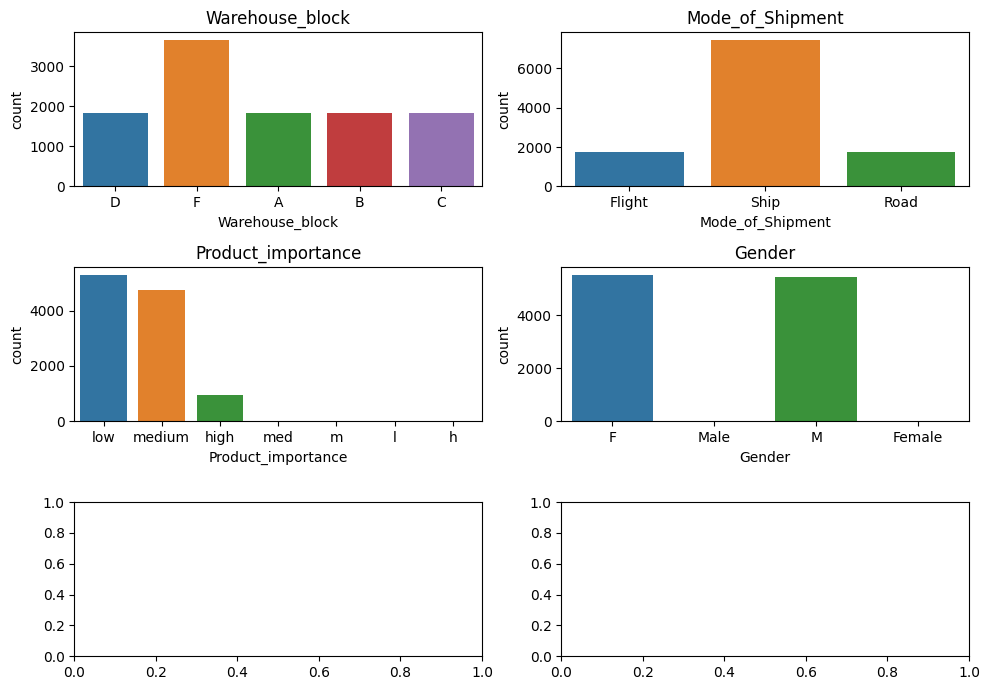

In [18]:
r=3 # jumlah baris
c=2 # jumlah kolom dalam grid
it=1 # iterasi mengontrol indeks subplot

fig, axes = plt.subplots(r, c, figsize=(10, 7))

for i in categorical:
    plt.subplot(r,c,it)
    sns.countplot(x=df_shipping[i])
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

In [19]:
df_shipping.Gender

0           F
1        Male
2           M
3           M
4           F
         ... 
10994       F
10995       F
10996       F
10997       M
10998       F
Name: Gender, Length: 10999, dtype: object

In [20]:
# Ganti nilai "Male" dan "Female" dengan "M" dan "F" di kolom "Gender"
df_shipping['Gender'].replace({'Male': 'M', 'Female': 'F'}, inplace=True)

# Tampilkan DataFrame setelah perubahan
df_shipping

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,7.0,1233,1
1,F,Flight,4,5,216,2.0,low,M,7.0,3088,1
2,A,Flight,2,2,183,4.0,low,M,7.0,3374,1
3,B,Flight,3,3,176,4.0,medium,M,10.0,1177,1
4,C,Flight,2,2,184,3.0,medium,F,7.0,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5.0,medium,F,1.0,1538,1
10995,B,Ship,4,1,232,5.0,medium,F,6.0,1247,0
10996,C,Ship,5,4,242,5.0,low,F,4.0,1155,0
10997,F,Ship,5,2,223,3.0,medium,M,2.0,1210,0


In [21]:
df_shipping.Product_importance

0           low
1           low
2           low
3        medium
4        medium
          ...  
10994    medium
10995    medium
10996       low
10997    medium
10998       low
Name: Product_importance, Length: 10999, dtype: object

In [22]:
# Ganti nilai "med", "m", "l", "h" dengan "low", "medium", "high" di kolom "Product_Importance"
df_shipping['Product_importance'].replace({'med': 'medium', 'm': 'medium', 'l': 'low', 'h': 'high'}, inplace=True)

# Tampilkan DataFrame setelah perubahan
df_shipping

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,7.0,1233,1
1,F,Flight,4,5,216,2.0,low,M,7.0,3088,1
2,A,Flight,2,2,183,4.0,low,M,7.0,3374,1
3,B,Flight,3,3,176,4.0,medium,M,10.0,1177,1
4,C,Flight,2,2,184,3.0,medium,F,7.0,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5.0,medium,F,1.0,1538,1
10995,B,Ship,4,1,232,5.0,medium,F,6.0,1247,0
10996,C,Ship,5,4,242,5.0,low,F,4.0,1155,0
10997,F,Ship,5,2,223,3.0,medium,M,2.0,1210,0


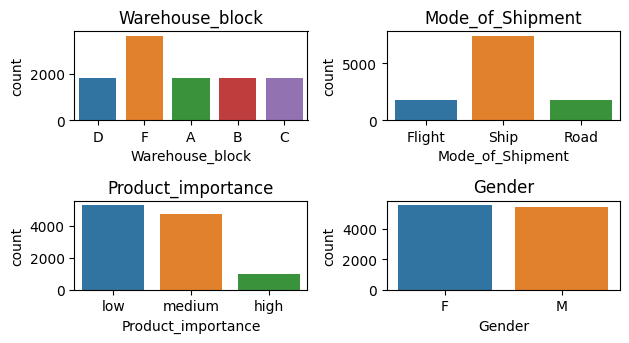


Value counts for Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value counts for Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value counts for Product_importance:
low       5299
medium    4752
high       948
Name: Product_importance, dtype: int64

Value counts for Gender:
F    5547
M    5452
Name: Gender, dtype: int64


In [23]:
r=3 # jumlah baris
c=2 # jumlah kolom dalam grid
it=1 # iterasi mengontrol indeks subplot

for i in categorical:
    plt.subplot(r,c,it)
    sns.countplot(x=df_shipping[i])
    plt.title(i)
    it+=1

plt.tight_layout()
plt.show()

# Tampilkan count untuk setiap nilai dalam kolom kategori
for col in categorical:
    print(f'\nValue counts for {col}:\n{df_shipping[col].value_counts()}')

In [24]:
# mengecek tipe data numerical

numerical = df_shipping.select_dtypes(include=np.number).columns
len(numerical)

7

<ipython-input-25-85095adbc052>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_shipping[i], hist=False)
<ipython-input-25-85095adbc052>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_shipping[i], hist=False)
<ipython-input-25-85095adbc052>:10: UserWarning: 

`distpl

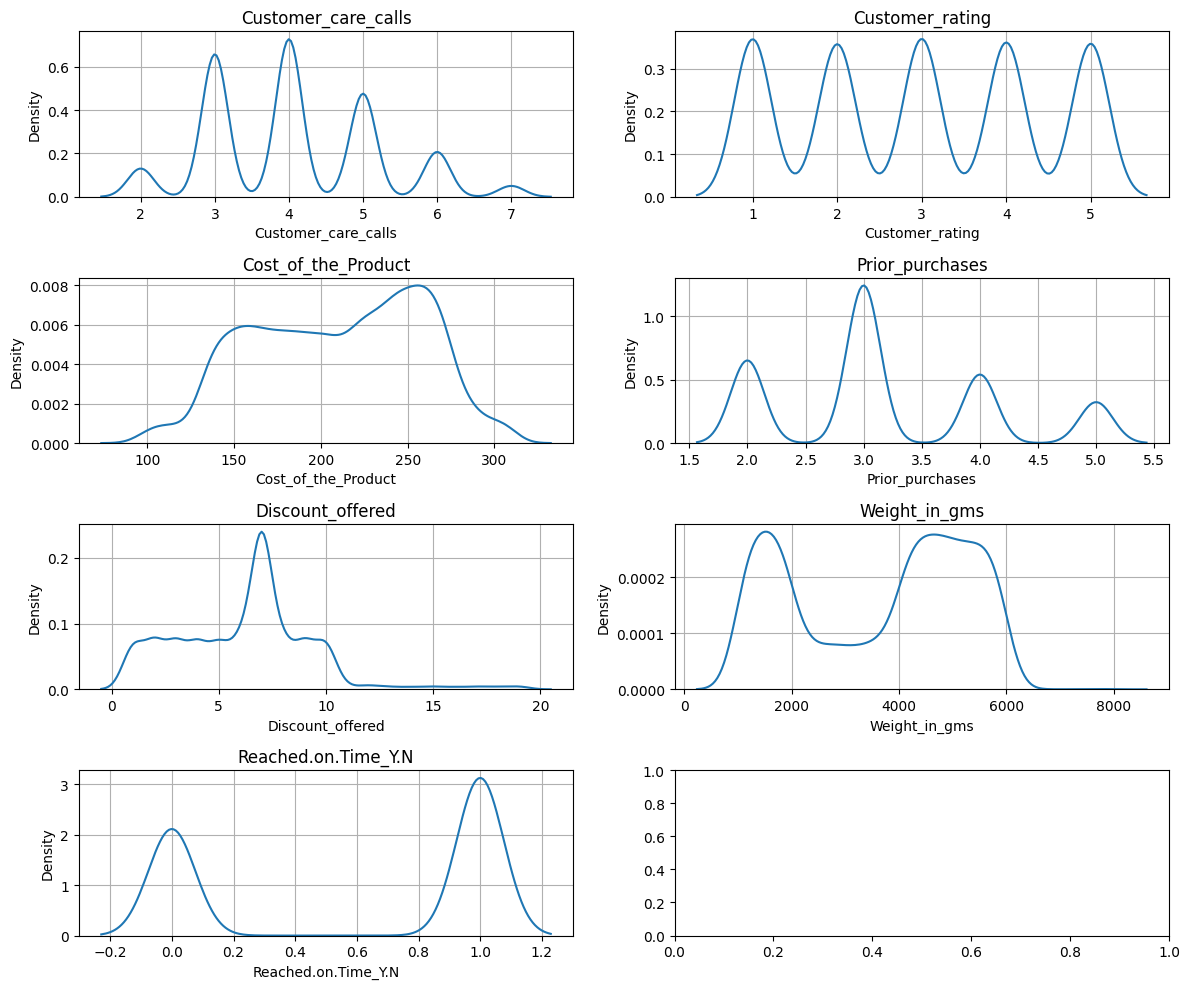

In [25]:
# Plotting distribusi variabel numerik setelah handling outlier
r = 4  # jumlah baris
c = 2  # jumlah kolom dalam grid
it = 1  # iterasi mengontrol indeks subplot

fig, axes = plt.subplots(r, c, figsize=(12, 10))

for i in numerical:
    plt.subplot(r, c, it)
    sns.distplot(df_shipping[i], hist=False)
    plt.title(i)
    plt.grid()
    it += 1

plt.tight_layout()
plt.show()

# Visualization

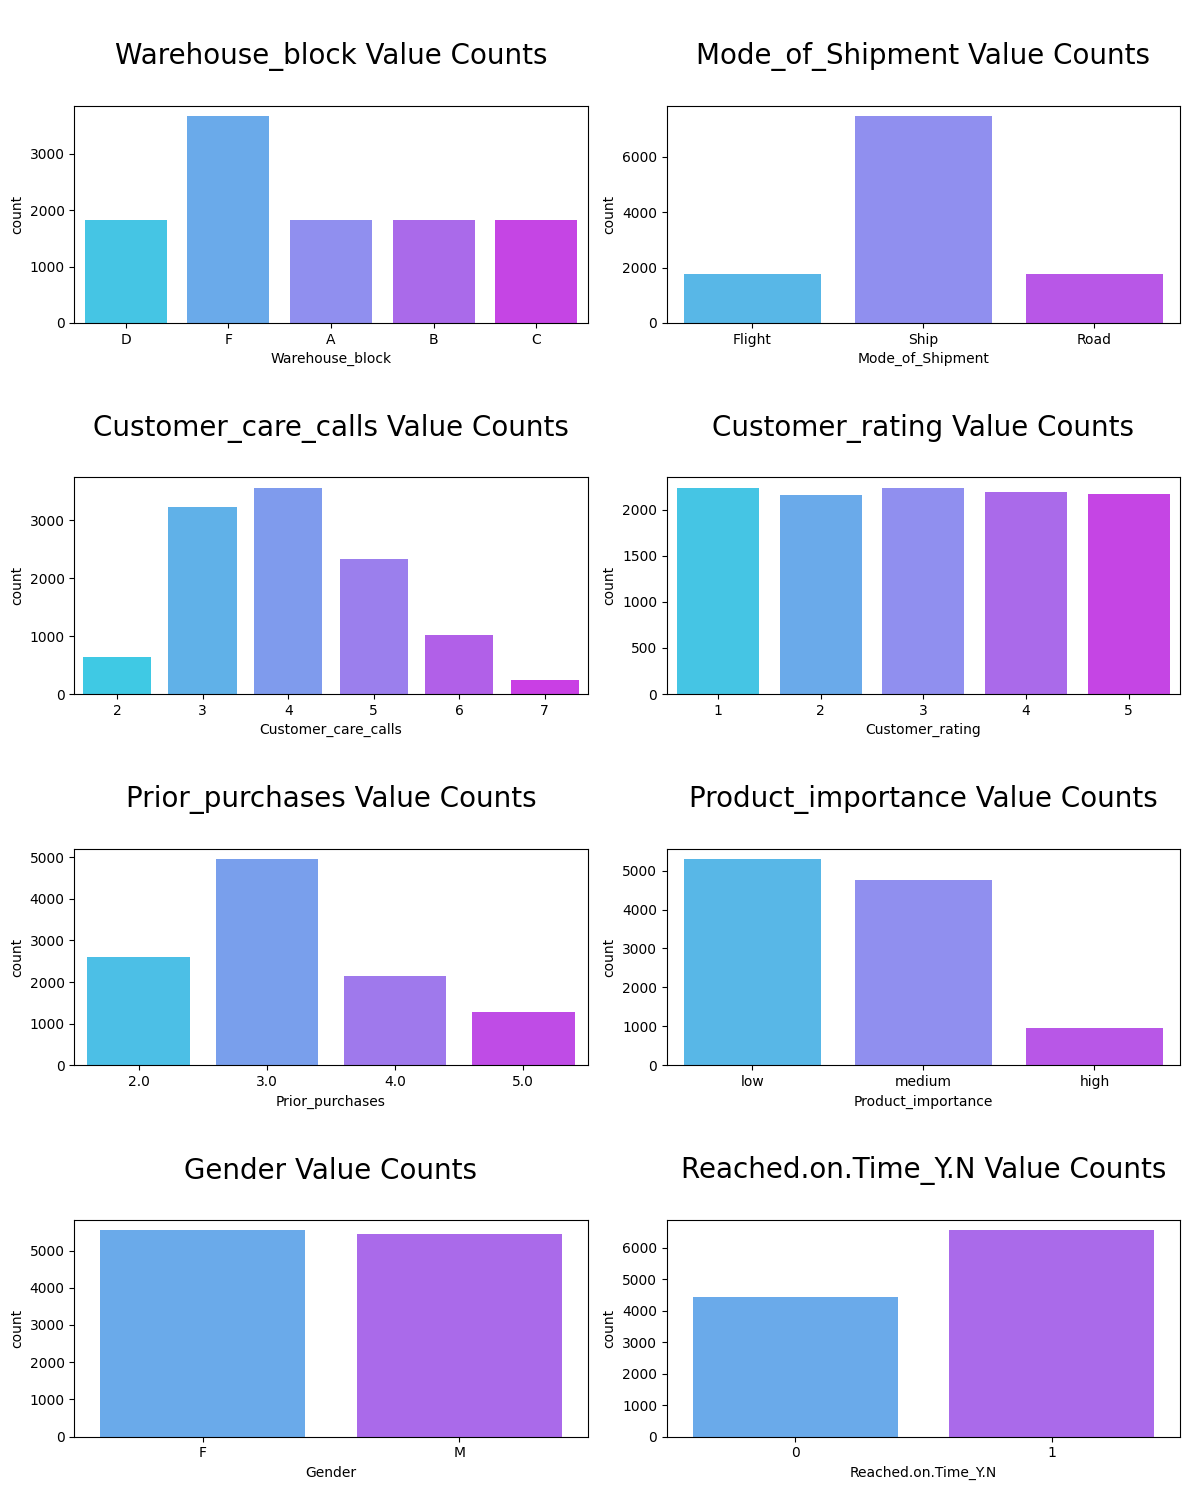

In [26]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
plt.figure(figsize = (12, 15))
plotnumber = 1


for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df_shipping, ax = ax, palette='cool')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [27]:
object_columns= df_shipping.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


Mode_of_Shipment  Reached.on.Time_Y.N
Flight            0                       708
                  1                      1069
Road              0                       725
                  1                      1035
Ship              0                      3003
                  1                      4459
Name: Reached.on.Time_Y.N, dtype: int64 


Mode_of_Shipment  Reached.on.Time_Y.N
Flight            0                      0.398424
                  1                      0.601576
Road              0                      0.411932
                  1                      0.588068
Ship              0                      0.402439
                  1                      0.597561
Name: Reached.on.Time_Y.N, dtype: float64


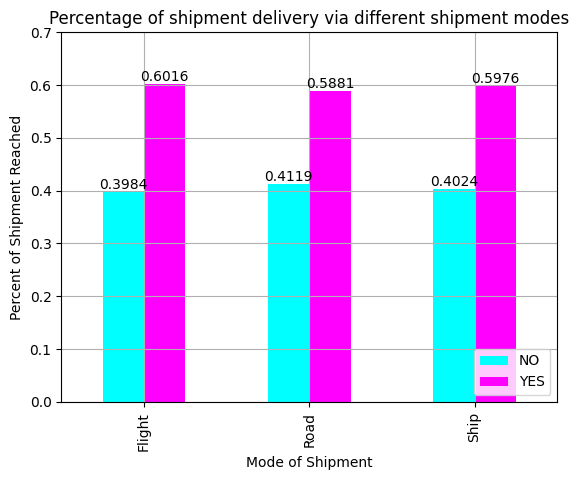

In [28]:
print(df_shipping.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count(),"\n\n")
print(df_shipping.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df_shipping.groupby(["Mode_of_Shipment"])["Reached.on.Time_Y.N"].count())


grouped = (df_shipping.groupby(["Mode_of_Shipment","Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()/df_shipping.groupby(["Mode_of_Shipment"])["Reached.on.Time_Y.N"].count()).unstack(fill_value=0)

# plot the grouped dataframe as a stacked bar chart
ax = grouped.plot(kind='bar', stacked=False,colormap = "cool")

# set the x-axis label
ax.set_xlabel('Mode of Shipment')

# set the y-axis label
ax.set_ylabel('Percent of Shipment Reached')

plt.legend(labels = ["No","Yes"])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.yticks([i*0.0001 for i in range(0,8000,1000)])
plt.grid(True)
plt.legend(loc = "lower right",labels = ["NO","YES"])
plt.title("Percentage of shipment delivery via different shipment modes")
# show the plot
plt.show()

In [29]:
# warehouse_block
warehouse=object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns=['warehouse','value_counts']
fig = px.pie(warehouse,names='warehouse',values='value_counts',color_discrete_sequence=px.colors.sequential.matter_r,width=650,height=400,hole=0.5)
fig.update_traces(textinfo='percent+label')

In [30]:
# gender
gender = object_columns['Gender'].value_counts().reset_index()
gender.columns=['Gender','value_counts']
fig=px.pie(gender,names='Gender',values='value_counts',color_discrete_sequence=px.colors.sequential.Darkmint_r,width=650,height=400,hole=0.5)
fig.update_traces(textinfo='percent+label')

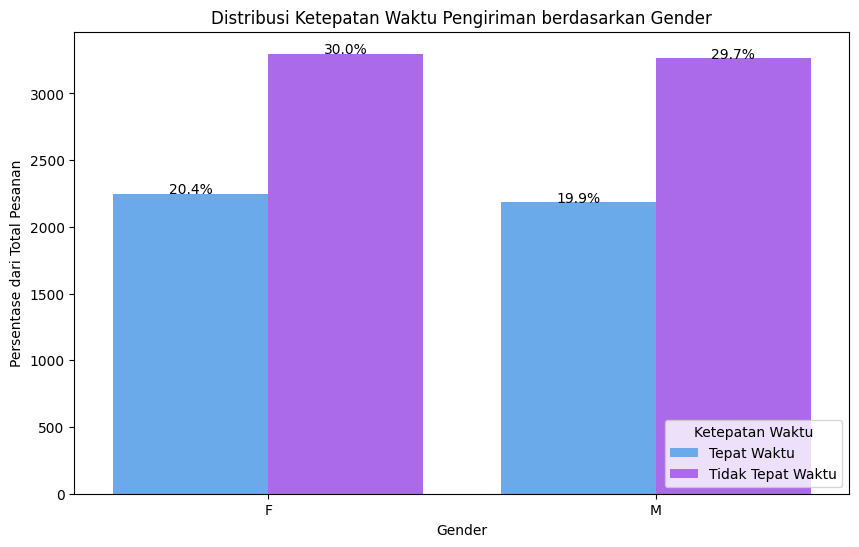

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df_shipping, palette='cool')

total = len(df_shipping['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribusi Ketepatan Waktu Pengiriman berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Persentase dari Total Pesanan')
plt.legend(title='Ketepatan Waktu', loc='lower right', labels=['Tepat Waktu', 'Tidak Tepat Waktu'])
plt.show()

In [32]:
mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts', color_discrete_sequence =
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

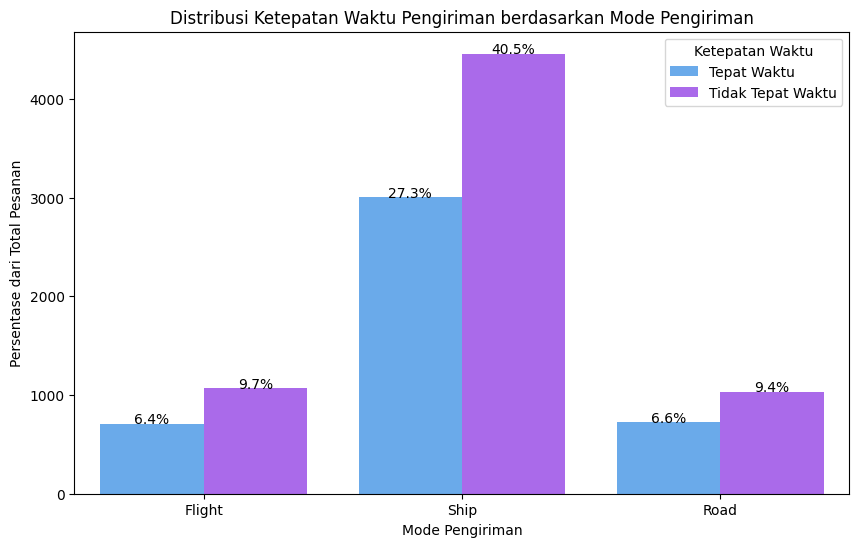

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df_shipping, palette='cool')

total = len(df_shipping['Mode_of_Shipment'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribusi Ketepatan Waktu Pengiriman berdasarkan Mode Pengiriman')
plt.xlabel('Mode Pengiriman')
plt.ylabel('Persentase dari Total Pesanan')
plt.legend(title='Ketepatan Waktu', loc='upper right', labels=['Tepat Waktu', 'Tidak Tepat Waktu'])
plt.show()

In [34]:
product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

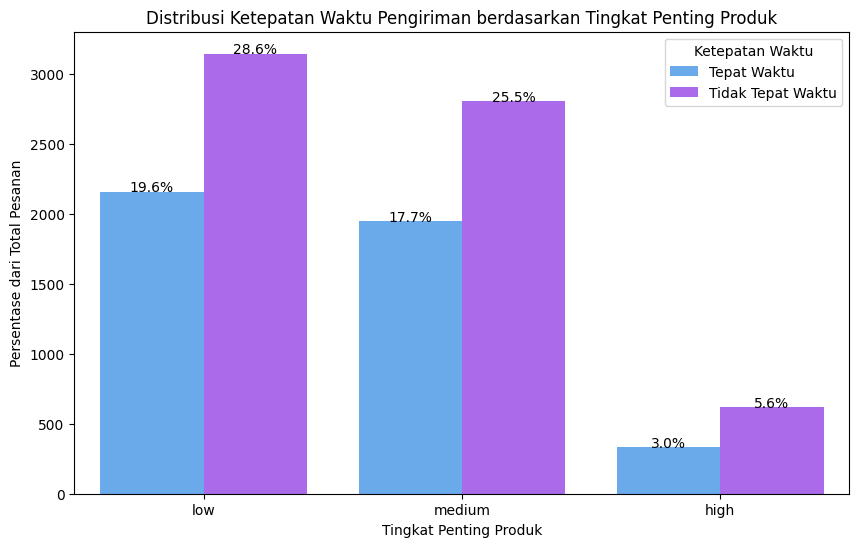

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df_shipping, palette='cool')

total = len(df_shipping['Product_importance'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribusi Ketepatan Waktu Pengiriman berdasarkan Tingkat Penting Produk')
plt.xlabel('Tingkat Penting Produk')
plt.ylabel('Persentase dari Total Pesanan')
plt.legend(title='Ketepatan Waktu', loc='upper right', labels=['Tepat Waktu', 'Tidak Tepat Waktu'])
plt.show()

In [36]:
customer_care=df_shipping['Customer_care_calls'].value_counts().reset_index()
customer_care.columns=['Customer_care_calls','value_counts']
fig = px.pie(customer_care,names='Customer_care_calls',values='value_counts',color_discrete_sequence=px.colors.sequential.matter_r, width=650,height=400,hole=0.5)
fig.update_traces(textinfo='percent+label')

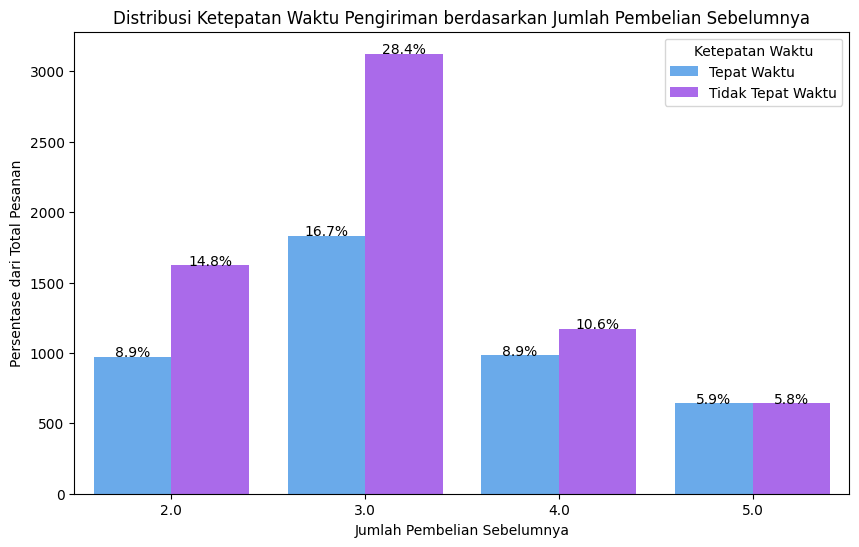

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data=df_shipping, palette='cool')

total = len(df_shipping['Prior_purchases'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribusi Ketepatan Waktu Pengiriman berdasarkan Jumlah Pembelian Sebelumnya')
plt.xlabel('Jumlah Pembelian Sebelumnya')
plt.ylabel('Persentase dari Total Pesanan')
plt.legend(title='Ketepatan Waktu', loc='upper right', labels=['Tepat Waktu', 'Tidak Tepat Waktu'])
plt.show()

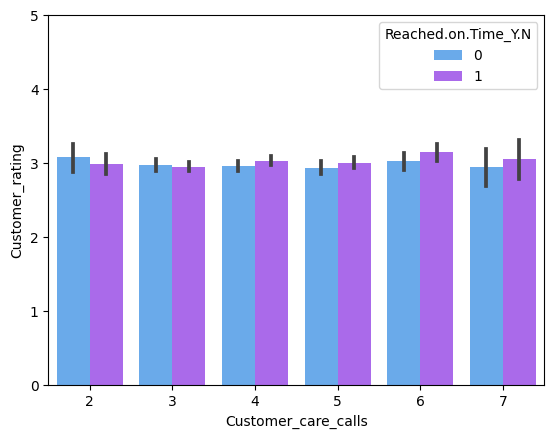

In [38]:
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = df_shipping, palette = 'cool')
plt.ylim(0, 5)
plt.show()

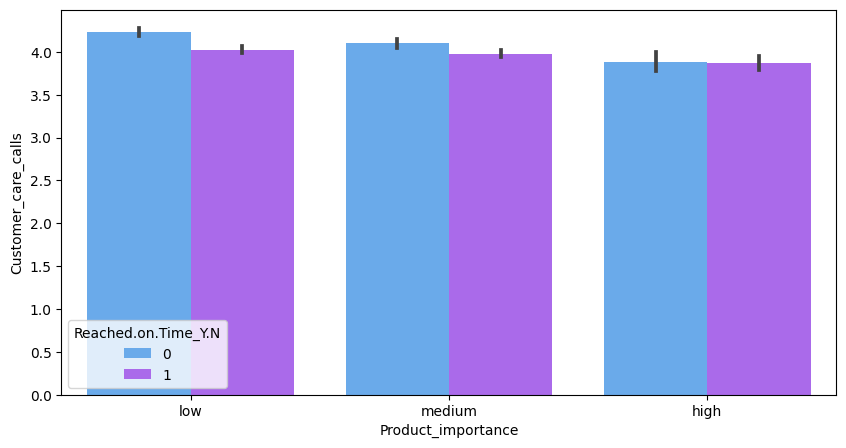

In [39]:
plt.figure(figsize = (10, 5))
sns.barplot(x='Product_importance', y = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df_shipping, palette = 'cool')
plt.show()

# Encoding and Scaling

In [41]:
# Pilih kolom yang akan digunakan
selected_columns = ['Cost_of_the_Product', 'Customer_care_calls', 'Customer_rating',
                    'Discount_offered', 'Gender', 'Mode_of_Shipment', 'Prior_purchases',
                    'Product_importance', 'Warehouse_block', 'Weight_in_gms']

In [42]:
# Subset data with selected columns
df_subset = df_shipping[selected_columns]

# Handle categorical variables using one-hot encoding
df_subset = pd.get_dummies(df_subset, columns=['Gender', 'Mode_of_Shipment', 'Product_importance', 'Warehouse_block'], drop_first=True)

In [43]:
# memisahkan label dengan fitur
y = df_shipping['Reached.on.Time_Y.N']
x = df_shipping.drop('Reached.on.Time_Y.N',axis=1)

In [44]:
categorical = df_shipping.select_dtypes(include='object').columns

le = LabelEncoder()

for column in categorical:
  df_shipping[column] = le.fit_transform(df_shipping[column])

In [45]:
# tampilan data
df_shipping

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1,0,7.0,1233,1
1,4,0,4,5,216,2.0,1,1,7.0,3088,1
2,0,0,2,2,183,4.0,1,1,7.0,3374,1
3,1,0,3,3,176,4.0,2,1,10.0,1177,1
4,2,0,2,2,184,3.0,2,0,7.0,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,0,1.0,1538,1
10995,1,2,4,1,232,5.0,2,0,6.0,1247,0
10996,2,2,5,4,242,5.0,1,0,4.0,1155,0
10997,4,2,5,2,223,3.0,2,1,2.0,1210,0


In [46]:
df_shipping[selected_columns].shape

(10999, 10)

# Modelling

In [47]:
# split data menjadi data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("The shape of x_train is: ",x_train.shape)
print("The shape of x_test is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train is:  (8799, 10)
The shape of x_test is:  (2200, 10)
The shape of y_train is:  (8799,)
The shape of y_test is:  (2200,)


In [48]:
# Pilih kolom numerik
x_numerical = x.select_dtypes(include=np.number)

In [49]:
# Scaling kolom numerik
scaler = StandardScaler()
x_numerical_scaled = pd.DataFrame(scaler.fit_transform(x_numerical), columns=x_numerical.columns)

In [50]:
# Pilih kolom selain numerik
x_categorical = x.select_dtypes(exclude=np.number)

# Gabungkan kembali DataFrame
x_scaled = pd.concat([x_numerical_scaled, x_categorical], axis=1)

In [51]:
x_scaled

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,-0.047711,-0.700755,-0.690722,-0.208488,0.257842,-1.468240,D,Flight,low,F
1,-0.047711,1.421578,0.120746,-1.285088,0.257842,-0.333893,F,Flight,low,M
2,-1.799887,-0.700755,-0.565881,0.868112,0.257842,-0.159002,A,Flight,low,M
3,-0.923799,0.006689,-0.711529,0.868112,1.202234,-1.502484,B,Flight,medium,M
4,-1.799887,-0.700755,-0.545074,-0.208488,0.257842,-0.703244,C,Flight,medium,F
...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,1.944713,-1.630941,-1.281730,A,Ship,medium,F
10995,-0.047711,-1.408199,0.453655,1.944713,-0.056955,-1.459679,B,Ship,medium,F
10996,0.828377,0.714133,0.661724,1.944713,-0.686549,-1.515937,C,Ship,low,F
10997,0.828377,-0.700755,0.266394,-0.208488,-1.316144,-1.482304,F,Ship,medium,M


In [52]:
# Tentukan kolom-kolom yang memerlukan one-hot encoding
categorical_cols = ['Gender', 'Mode_of_Shipment', 'Product_importance', 'Warehouse_block']

In [53]:
# Tentukan transformer untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Tentukan transformer untuk data numerikal (jika ada)
numeric_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Gabungkan transformer untuk data kategorikal dan numerikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [54]:
# Definisikan pipeline dengan model Decision Tree
model_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier())])

# Latih model dengan data training
model_dt.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Mode_of_Shipment',
                                                   'Product_importance',
                                                   'Warehouse_block'])])),
                ('classifier', DecisionTreeClassifier())])

In [55]:
# Lakukan prediksi pada data test
y_pred = model_dt.predict(x_test)

# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil metrik kinerja
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Confusion Matrix:
[[507 388]
 [383 922]]
Accuracy: 0.6495454545454545
Precision: 0.7038167938931298
Recall: 0.7065134099616859
F1-score: 0.7051625239005735


In [56]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



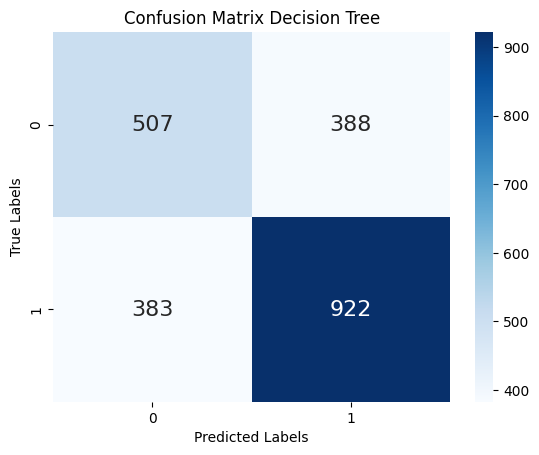

True Positive (TP): 922
False Negative (FN): 383
False Positive (FP): 388
True Negative (TN): 507


In [57]:
# Mengambil nilai TP, FN, FP, TN
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

# Visualisasi confusion matrix dengan heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Tampilkan hasil
print(f'True Positive (TP): {TP}')
print(f'False Negative (FN): {FN}')
print(f'False Positive (FP): {FP}')
print(f'True Negative (TN): {TN}')

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definisi hyperparameter yang akan diuji
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Inisialisasi model dan pipeline
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search = GridSearchCV(pipeline_gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# Prediksi target pada data uji
y_pred_best = best_model.predict(x_test)

# Tampilkan classification report untuk model terbaik
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.58      0.91      0.71       895
           1       0.89      0.55      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.77      0.69      0.69      2200



In [59]:
# Lakukan prediksi pada data test
y_pred = best_model.predict(x_test)

# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil metrik kinerja
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Confusion Matrix:
[[810  85]
 [590 715]]
Accuracy: 0.6931818181818182
Precision: 0.89375
Recall: 0.5478927203065134
F1-score: 0.6793349168646081


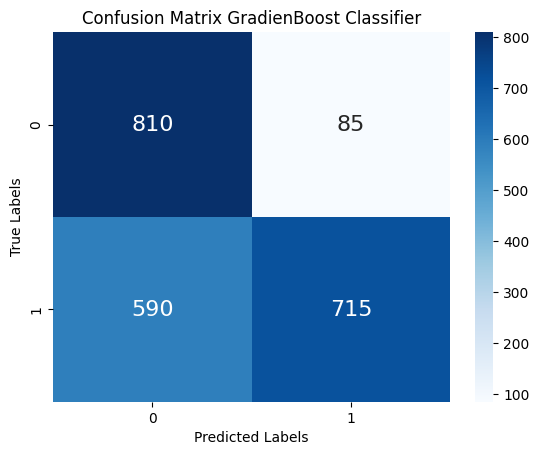

True Positive (TP): 715
False Negative (FN): 590
False Positive (FP): 85
True Negative (TN): 810


In [60]:
# Mengambil nilai TP, FN, FP, TN
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

# Visualisasi confusion matrix dengan heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix GradienBoost Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Tampilkan hasil
print(f'True Positive (TP): {TP}')
print(f'False Negative (FN): {FN}')
print(f'False Positive (FP): {FP}')
print(f'True Negative (TN): {TN}')

# Feature Importance

In [61]:
# Gabungkan transformer untuk data kategorikal dan numerikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline dengan preprocessor dan model Decision Tree
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split data menjadi training dan testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Latih model menggunakan pipeline
pipeline_dt.fit(x_train, y_train)

# Mengakses model Decision Tree dari pipeline
dt_model = pipeline_dt.named_steps['classifier']

# Mengakses feature importances
feature_importances = dt_model.feature_importances_

# Menampilkan feature importances untuk setiap fitur
for feature, importance in zip(x_train.columns, feature_importances):
    print(f'{feature}: {importance}')

Warehouse_block: 0.04974736762818076
Mode_of_Shipment: 0.05468256066837127
Customer_care_calls: 0.18911291736554214
Customer_rating: 0.09455536061125615
Cost_of_the_Product: 0.08680820332823627
Prior_purchases: 0.3869687252016109
Product_importance: 0.01668758519542201
Gender: 0.013635371918712204
Discount_offered: 0.01624475161629278
Weight_in_gms: 0.013231549023600379


In [62]:
# Menampilkan feature importances untuk setiap fitur, diurutkan dari yang paling besar
sorted_importances = sorted(zip(x_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Eksklusi kolom 'ID'
sorted_importances = [imp for imp in sorted_importances if imp[0] != 'ID']

for feature, importance in sorted_importances:
    print(f'{feature}: {importance}')

Prior_purchases: 0.3869687252016109
Customer_care_calls: 0.18911291736554214
Customer_rating: 0.09455536061125615
Cost_of_the_Product: 0.08680820332823627
Mode_of_Shipment: 0.05468256066837127
Warehouse_block: 0.04974736762818076
Product_importance: 0.01668758519542201
Discount_offered: 0.01624475161629278
Gender: 0.013635371918712204
Weight_in_gms: 0.013231549023600379


In [63]:
# Misalnya, menyimpan DataFrame df_subset ke dalam file Excel
df_subset.to_excel('shipping_data.xlsx', index=False)